# Sheema Zainab M I 19MID0014

Decision Tree using python:

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

#Load the dataset.


In [2]:
data = pd.read_csv('PlayTennis.csv')
data.head()


,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [27]:
X = data.iloc[:,[2,3]].values
y = data.iloc[:,4].values

#encoding

In [28]:
from sklearn import preprocessing
string_to_int= preprocessing.LabelEncoder()
data=data.apply(string_to_int.fit_transform)

feature_cols = ['outlook','temp','humidity','windy']
X = data[feature_cols ]
y = data.play

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.70, random_state= 42)


In [30]:
X_train

,outlook,temp,humidity,windy
7,2,2,0,0
10,2,2,1,1
3,1,2,0,0
6,0,0,1,1


In [31]:
X_test

,outlook,temp,humidity,windy
9,1,2,1,0
11,0,2,0,1
0,2,1,0,0
12,0,1,1,0
5,1,0,1,1
8,2,0,1,0
2,0,1,0,0
1,2,1,0,1
13,1,2,0,1
4,1,0,1,0



#feature scaling


In [32]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()


In [33]:
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

C:\Users\sheem\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sheem\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\sheem\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [34]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)


C:\Users\sheem\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


#prediction

In [35]:
y_pred = classifier.predict(X_test)#Accuracy
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))


Accuracy Score: 0.8


In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[2, 2],
       [0, 6]], dtype=int64)

In [37]:
# Create Decision Tree classifer object
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# Train Decision Tree Classifer
classifier = classifier.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = classifier.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8


C:\Users\sheem\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


In [24]:
!pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=38ad862a3d632e00625df741812e7245eff3dbc3c88552f0d9229795fe64ede1
  Stored in directory: c:\users\sheem\appdata\local\pip\cache\wheels\1e\7b\04\7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus


You should consider upgrading via the 'c:\users\sheem\anaconda3\python.exe -m pip install --upgrade pip' command.


In [38]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

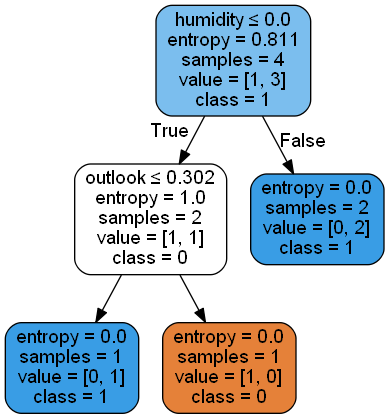

In [39]:
from pydotplus import graph_from_dot_data
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
